# Wine Quality Control Dataset With Random Forest

In [1]:
import pandas
import seaborn
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
wine_dataset = pandas.read_csv("Machine Learning Data Set/winequality-white.csv", sep=';')
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [3]:
wine_dataset.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [4]:
boundaries = [2, 6, 9]
group_names = ['low', 'high']
wine_dataset['quality'] = pandas.cut(wine_dataset['quality'], bins = boundaries, labels = group_names)

In [5]:
wine_dataset['quality'].value_counts()

low     3838
high    1060
Name: quality, dtype: int64

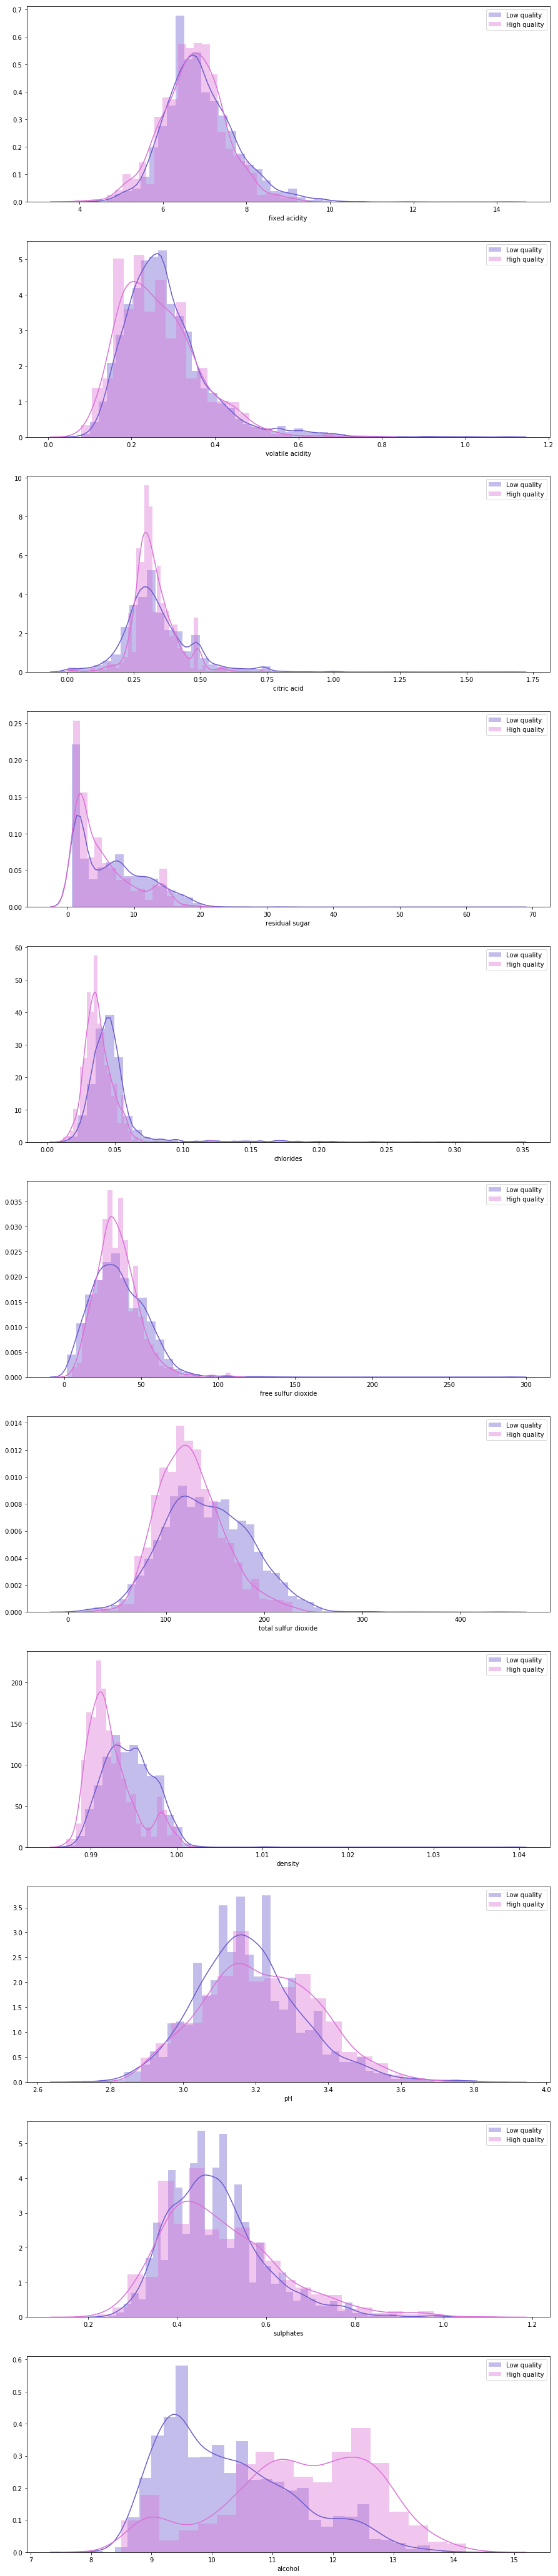

In [6]:
pyplot.figure(figsize=(15, 75))
features_list = list(wine_dataset.columns[: len(wine_dataset.columns) - 1])
rows = len(features_list)

for i, feature in enumerate(features_list):    
    pyplot.subplot(rows, 1, i + 1)
    
    seaborn.distplot(wine_dataset[wine_dataset['quality'] == 'low'][feature], 
                     color='slateblue', label='Low quality');
    seaborn.distplot(wine_dataset[wine_dataset['quality'] == 'high'][feature], 
                     color='orchid', label='High quality');
    pyplot.legend(loc='upper right')

pyplot.show()

In [7]:
labels = wine_dataset['quality']
wine_dataset.drop(['quality'], axis=1, inplace=True)

In [8]:
train_values, test_values, train_labels, test_labels = \
train_test_split(wine_dataset, labels, stratify=labels, random_state=42)

In [9]:
forest_clasifier = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)
forest_clasifier.fit(train_values, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=17, verbose=0, warm_start=False)

In [10]:
print("Accuracy of random forest on training set: {:.3f}"\
      .format(forest_clasifier.score(train_values, train_labels)))
print("Accuracy of random forest on test set: {:.3f}"\
      .format(forest_clasifier.score(test_values, test_labels)))

Accuracy of random forest on training set: 1.000
Accuracy of random forest on test set: 0.875


In [11]:
number_estimators_param = list(range(50, 101, 10))
print(number_estimators_param)

max_depth_param = list(range(10, 51, 10))
print(max_depth_param)

[50, 60, 70, 80, 90, 100]
[10, 20, 30, 40, 50]


In [12]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': number_estimators_param, 
              'max_depth': max_depth_param}

cross_valid = GridSearchCV(RandomForestClassifier(n_jobs=-1, class_weight='balanced'), param_grid, 
                           cv=4, scoring='accuracy')

In [13]:
%%time
cross_valid.fit(train_values, train_labels);

Wall time: 1min 15s


GridSearchCV(cv=4, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 60, 70, 80, 90, 100], 'max_depth': [10, 20, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [14]:
print('Best parameter for random forest classifier: {estimators} estimators, depth of {depth}.\n\
Highest score on cross validation: {score:.3f}'.format(estimators=cross_valid.best_params_['n_estimators'], 
                                                       depth=cross_valid.best_params_['max_depth'], 
                                                       score=cross_valid.best_score_))

Best parameter for random forest classifier: 50 estimators, depth of 30.
Highest score on cross validation: 0.866


In [15]:
cross_valid_results = pandas.DataFrame(cross_valid.cv_results_)
cross_valid_represent_train = cross_valid_results.loc[0:, ['param_n_estimators', 
                                                           'param_max_depth', 
                                                           'mean_train_score']]

cross_valid_represent_train['mean_train_score'] = \
    cross_valid_represent_train['mean_train_score'].apply(lambda value: round(value, 3))
cross_valid_represent_train.head(10)

,param_n_estimators,param_max_depth,mean_train_score
0,50,10,0.933
1,60,10,0.936
2,70,10,0.934
3,80,10,0.936
4,90,10,0.937
5,100,10,0.935
6,50,20,1.000
7,60,20,1.000
8,70,20,1.000
9,80,20,1.000


In [16]:
cross_valid_represent_test = cross_valid_results.loc[0:, ['param_n_estimators', 
                                                          'param_max_depth', 
                                                          'mean_test_score']]

cross_valid_represent_test['mean_test_score'] = \
    cross_valid_represent_test['mean_test_score'].apply(lambda value: round(value, 3))
cross_valid_represent_test.head(10)

,param_n_estimators,param_max_depth,mean_test_score
0,50,10,0.834
1,60,10,0.839
2,70,10,0.837
3,80,10,0.833
4,90,10,0.838
5,100,10,0.837
6,50,20,0.865
7,60,20,0.865
8,70,20,0.864
9,80,20,0.861


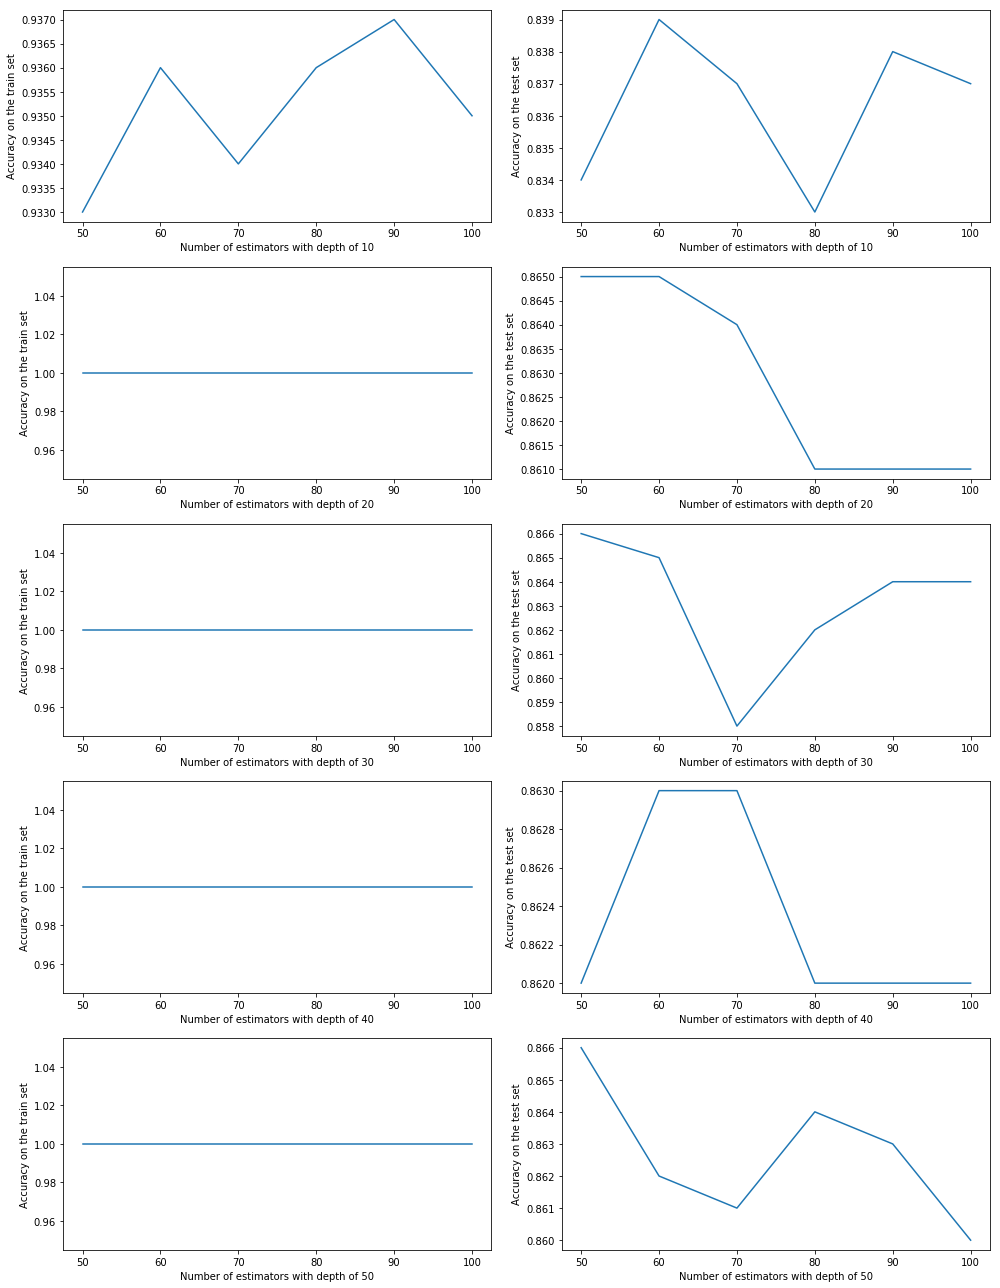

In [17]:
rows = len(param_grid['max_depth'])
figure, axis = pyplot.subplots(rows, 2, figsize=(14, 18))

for i, depth in enumerate(param_grid['max_depth']):
    
    spec_cross_valid_train = cross_valid_represent_train[cross_valid_represent_train['param_max_depth'] == depth]
    spec_cross_valid_test = cross_valid_represent_test[cross_valid_represent_test['param_max_depth'] == depth]
    
    axis[i, 0].set_xlabel('Number of estimators with depth of {}'.format(depth))
    axis[i, 0].set_ylabel('Accuracy on the train set')
    axis[i, 0].plot(param_grid['n_estimators'], spec_cross_valid_train['mean_train_score'])
    
    axis[i, 1].set_xlabel('Number of estimators with depth of {}'.format(depth))
    axis[i, 1].set_ylabel('Accuracy on the test set')
    axis[i, 1].plot(param_grid['n_estimators'], spec_cross_valid_test['mean_test_score'])
    
    figure.tight_layout();

In [18]:
forest_clasifier = cross_valid.best_estimator_

from sklearn.metrics import accuracy_score
print("Accuracy of tuned random forest on test set: {:.3f}" \
      .format(accuracy_score(test_labels, forest_clasifier.predict(test_values))))

Accuracy of tuned random forest on test set: 0.872
